In [1]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

In [2]:
import re

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [3]:
tokens = tokenize(text)
tokens

['machine',
 'learning',
 'is',
 'the',
 'study',
 'of',
 'computer',
 'algorithms',
 'that',
 'improve',
 'automatically',
 'through',
 'experience',
 'it',
 'is',
 'seen',
 'as',
 'a',
 'subset',
 'of',
 'artificial',
 'intelligence',
 'machine',
 'learning',
 'algorithms',
 'build',
 'a',
 'mathematical',
 'model',
 'based',
 'on',
 'sample',
 'data',
 'known',
 'as',
 'training',
 'data',
 'in',
 'order',
 'to',
 'make',
 'predictions',
 'or',
 'decisions',
 'without',
 'being',
 'explicitly',
 'programmed',
 'to',
 'do',
 'so',
 'machine',
 'learning',
 'algorithms',
 'are',
 'used',
 'in',
 'a',
 'wide',
 'variety',
 'of',
 'applications',
 'such',
 'as',
 'email',
 'filtering',
 'and',
 'computer',
 'vision',
 'where',
 'it',
 'is',
 'difficult',
 'or',
 'infeasible',
 'to',
 'develop',
 'conventional',
 'algorithms',
 'to',
 'perform',
 'the',
 'needed',
 'tasks']

In [4]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

In [5]:
word_to_id, id_to_word = mapping(tokens)
word_to_id

{'seen': 0,
 'known': 1,
 'machine': 2,
 'a': 3,
 'predictions': 4,
 'the': 5,
 'to': 6,
 'it': 7,
 'such': 8,
 'algorithms': 9,
 'sample': 10,
 'being': 11,
 'vision': 12,
 'improve': 13,
 'wide': 14,
 'difficult': 15,
 'infeasible': 16,
 'make': 17,
 'experience': 18,
 'computer': 19,
 'decisions': 20,
 'explicitly': 21,
 'perform': 22,
 'training': 23,
 'build': 24,
 'in': 25,
 'needed': 26,
 'through': 27,
 'mathematical': 28,
 'are': 29,
 'conventional': 30,
 'subset': 31,
 'variety': 32,
 'tasks': 33,
 'artificial': 34,
 'applications': 35,
 'as': 36,
 'learning': 37,
 'or': 38,
 'where': 39,
 'that': 40,
 'model': 41,
 'used': 42,
 'so': 43,
 'without': 44,
 'data': 45,
 'intelligence': 46,
 'develop': 47,
 'of': 48,
 'programmed': 49,
 'based': 50,
 'automatically': 51,
 'do': 52,
 'email': 53,
 'study': 54,
 'order': 55,
 'is': 56,
 'filtering': 57,
 'on': 58,
 'and': 59}

In [6]:
import numpy as np

np.random.seed(42)


def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
    
    return np.asarray(X), np.asarray(y)

In [7]:
def concat(*iterables):
    for iterable in iterables:
        yield from iterable

In [8]:
def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [9]:
X, y = generate_training_data(tokens, word_to_id, 2)

In [10]:
X

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
X.shape

(330, 60)

In [12]:
y.shape

(330, 60)

In [13]:
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [14]:
model = init_network(len(word_to_id), 10)


In [15]:
def forward(model, X, return_cache=True):
    cache = {}
    
    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    return cache

In [16]:
def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

In [17]:
(X @ model["w1"]).shape


(330, 10)

In [18]:
(X @ model["w1"] @ model["w2"]).shape


(330, 60)

In [19]:
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

In [20]:
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

<ipython-input-21-f4f09dca4e00>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


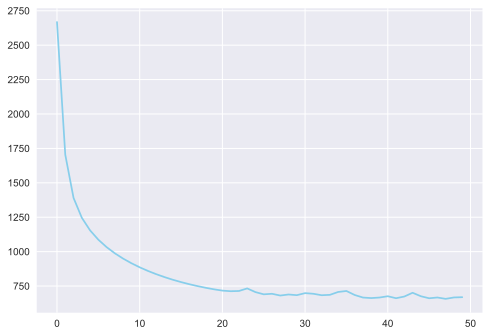

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

n_iter = 50
learning_rate = 0.05

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [22]:
learning = one_hot_encode(word_to_id["learning"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

machine
so
intelligence
are
is
algorithms
build
the
artificial
a
sample
study
learning
tasks
perform
automatically
subset
in
vision
model
do
computer
data
it
training
on
based
that
as
programmed
of
variety
conventional
decisions
improve
mathematical
where
to
known
infeasible
order
seen
wide
applications
through
needed
make
used
experience
filtering
such
develop
being
without
email
difficult
and
or
explicitly
predictions


In [23]:
model["w1"]


array([[ 1.31718938e-01,  1.09784550e+00,  6.77579437e-01,
         1.81706922e+00, -2.51688510e-02, -6.00862109e-01,
         2.26780824e+00,  3.33288685e-01,  9.99216249e-01,
        -1.07621673e+00],
       [ 2.32144490e-01,  1.41636139e+00,  8.87183167e-02,
        -3.88895970e-01, -7.94290842e-02, -1.85306167e+00,
        -2.22968072e-01, -8.80088230e-01, -1.80334725e+00,
        -1.08499965e+00],
       [ 1.32415587e-01, -1.85036909e+00, -7.09201953e-01,
         5.25665001e-01, -6.81233327e-02,  6.70484289e-01,
        -1.30426220e+00, -9.07679144e-01,  1.85671413e-02,
        -1.02891368e+00],
       [ 1.66933425e+00,  9.21932907e-01,  7.93419469e-02,
        -5.08182038e-01, -2.07629217e+00, -5.38316650e-01,
         1.44727431e-01, -1.52550503e-01,  9.01009198e-01,
         9.64365845e-01],
       [-1.30934268e+00, -6.07877239e-02, -1.13702434e+00,
         9.29784773e-01, -1.79061751e+00, -5.03347162e-01,
        -8.44704250e-01,  1.40841359e+00,  1.58201286e-01,
        -1.

In [24]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]


In [25]:
get_embedding(model, "machine")


array([ 0.13241559, -1.85036909, -0.70920195,  0.525665  , -0.06812333,
        0.67048429, -1.3042622 , -0.90767914,  0.01856714, -1.02891368])